In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
import re

In [3]:
sentence  = """Reading is a very good habit that one needs to develop in life. Good books can inform you, enlighten you and lead you in the right direction. There is no better companion than a good book. Reading is important because it is good for your overall well-being. Once you start reading, you experience a whole new world. When you start loving the habit of reading you eventually get addicted to it. Reading develops language skills and vocabulary. Reading books is also a way to relax and reduce stress. It is important to read a good book at least for a few minutes each day to stretch the brain muscles for healthy functioning. , Books really are your best friends as you can rely on them when you are bored, upset, depressed, lonely or annoyed. They will accompany you anytime you want them and enhance your mood. They share with you information and knowledge any time you need. Good books always guide you to the correct path in life. Following are the benefits of reading –Self Improvement: Reading helps you develop positive thinking.
Reading is important because it develops your mind and gives you excessive knowledge and lessons of life. It helps you understand the world around you better. It keeps your mind active and enhances your creative ability.
Communication Skills: Reading improves your vocabulary and develops your communication skills. It helps you learn how to use your language creatively. Not only does it improve your communication but it also makes you a better writer. Good communication is important in every aspect of life.
Increases Knowledge: Books enable you to have a glimpse into cultures, traditions, arts, history, geography, health, psychology and several other subjects and aspects of life. You get an amazing amount of knowledge and information from books.
Reduces Stress: Reading a good book takes you in a new world and helps you relieve your day to day stress. It has several positive effects on your mind, body, and soul. It stimulates your brain muscles and keeps your brain healthy and strong.
Great Pleasure: When I read a book, I read it for pleasure. I just indulge myself in reading and experience a whole new world. Once I start reading a book I get so captivated I never want to leave it until I finish. It always gives a lot of pleasure to read a good book and cherish it for a lifetime.
Boosts your Imagination and Creativity: Reading takes you to the world of imagination and enhances your creativity. Reading helps you explore life from different perspectives. While you read books you are building new and creative thoughts, images and opinions in your mind. It makes you think creatively, fantasize and use your imagination.Develops your Analytical Skills: By active reading, you explore several aspects of life. It involves questioning what you read. It helps you develop your thoughts and express your opinions. New ideas and thoughts pop up in your mind by active reading. It stimulates and develops your brain and gives you a new perspective.Reduces Boredom: Journeys for long hours or a long vacation from work can be pretty boring in spite of all the social sites. Books come in handy and release you from boredom."""

In [6]:
sentence =  re.sub("[^A-za-z0-9]"," ",sentence)
sentence

'Reading is a very good habit that one needs to develop in life  Good books can inform you  enlighten you and lead you in the right direction  There is no better companion than a good book  Reading is important because it is good for your overall well being  Once you start reading  you experience a whole new world  When you start loving the habit of reading you eventually get addicted to it  Reading develops language skills and vocabulary  Reading books is also a way to relax and reduce stress  It is important to read a good book at least for a few minutes each day to stretch the brain muscles for healthy functioning    Books really are your best friends as you can rely on them when you are bored  upset  depressed  lonely or annoyed  They will accompany you anytime you want them and enhance your mood  They share with you information and knowledge any time you need  Good books always guide you to the correct path in life  Following are the benefits of reading  Self Improvement  Reading 

In [9]:
sentence= re.sub(r'(?:^| )\w(?:$| )', ' ', sentence).strip()
sentence

'reading is very good habit that one needs to develop in life  good books can inform you  enlighten you and lead you in the right direction  there is no better companion than good book  reading is important because it is good for your overall well being  once you start reading  you experience whole new world  when you start loving the habit of reading you eventually get addicted to it  reading develops language skills and vocabulary  reading books is also way to relax and reduce stress  it is important to read good book at least for few minutes each day to stretch the brain muscles for healthy functioning    books really are your best friends as you can rely on them when you are bored  upset  depressed  lonely or annoyed  they will accompany you anytime you want them and enhance your mood  they share with you information and knowledge any time you need  good books always guide you to the correct path in life  following are the benefits of reading  self improvement  reading helps you de

In [11]:
sentence = sentence.lower()
sentence

'reading is very good habit that one needs to develop in life  good books can inform you  enlighten you and lead you in the right direction  there is no better companion than good book  reading is important because it is good for your overall well being  once you start reading  you experience whole new world  when you start loving the habit of reading you eventually get addicted to it  reading develops language skills and vocabulary  reading books is also way to relax and reduce stress  it is important to read good book at least for few minutes each day to stretch the brain muscles for healthy functioning    books really are your best friends as you can rely on them when you are bored  upset  depressed  lonely or annoyed  they will accompany you anytime you want them and enhance your mood  they share with you information and knowledge any time you need  good books always guide you to the correct path in life  following are the benefits of reading  self improvement  reading helps you de

In [12]:
word =  sentence.split()
word

['reading',
 'is',
 'very',
 'good',
 'habit',
 'that',
 'one',
 'needs',
 'to',
 'develop',
 'in',
 'life',
 'good',
 'books',
 'can',
 'inform',
 'you',
 'enlighten',
 'you',
 'and',
 'lead',
 'you',
 'in',
 'the',
 'right',
 'direction',
 'there',
 'is',
 'no',
 'better',
 'companion',
 'than',
 'good',
 'book',
 'reading',
 'is',
 'important',
 'because',
 'it',
 'is',
 'good',
 'for',
 'your',
 'overall',
 'well',
 'being',
 'once',
 'you',
 'start',
 'reading',
 'you',
 'experience',
 'whole',
 'new',
 'world',
 'when',
 'you',
 'start',
 'loving',
 'the',
 'habit',
 'of',
 'reading',
 'you',
 'eventually',
 'get',
 'addicted',
 'to',
 'it',
 'reading',
 'develops',
 'language',
 'skills',
 'and',
 'vocabulary',
 'reading',
 'books',
 'is',
 'also',
 'way',
 'to',
 'relax',
 'and',
 'reduce',
 'stress',
 'it',
 'is',
 'important',
 'to',
 'read',
 'good',
 'book',
 'at',
 'least',
 'for',
 'few',
 'minutes',
 'each',
 'day',
 'to',
 'stretch',
 'the',
 'brain',
 'muscles',
 'for'

In [14]:
vocab = set(word)
vocab_size =  len(vocab)

In [52]:
embed_dim = 10
context_size = 2

In [53]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
word_to_ix

{'history': 0,
 'different': 1,
 'better': 2,
 'reduce': 3,
 'good': 4,
 'there': 5,
 'great': 6,
 'eventually': 7,
 'or': 8,
 'share': 9,
 'by': 10,
 'work': 11,
 'creatively': 12,
 'develop': 13,
 'habit': 14,
 'books': 15,
 'active': 16,
 'lead': 17,
 'as': 18,
 'needs': 19,
 'takes': 20,
 'finish': 21,
 'perspectives': 22,
 'to': 23,
 'time': 24,
 'several': 25,
 'rely': 26,
 'want': 27,
 'just': 28,
 'cultures': 29,
 'use': 30,
 'from': 31,
 'not': 32,
 'information': 33,
 'stress': 34,
 'need': 35,
 'communication': 36,
 'annoyed': 37,
 'enhance': 38,
 'lifetime': 39,
 'no': 40,
 'enlighten': 41,
 'brain': 42,
 'develops': 43,
 'effects': 44,
 'anytime': 45,
 'read': 46,
 'come': 47,
 'bored': 48,
 'when': 49,
 'lot': 50,
 'you': 51,
 'and': 52,
 'enhances': 53,
 'following': 54,
 'very': 55,
 'boring': 56,
 'soul': 57,
 'loving': 58,
 'thoughts': 59,
 'overall': 60,
 'other': 61,
 'companion': 62,
 'have': 63,
 'start': 64,
 'lonely': 65,
 'direction': 66,
 'well': 67,
 'upset':

In [54]:
ix_to_word = {i: word for i, word in enumerate(vocab)}
ix_to_word


{0: 'history',
 1: 'different',
 2: 'better',
 3: 'reduce',
 4: 'good',
 5: 'there',
 6: 'great',
 7: 'eventually',
 8: 'or',
 9: 'share',
 10: 'by',
 11: 'work',
 12: 'creatively',
 13: 'develop',
 14: 'habit',
 15: 'books',
 16: 'active',
 17: 'lead',
 18: 'as',
 19: 'needs',
 20: 'takes',
 21: 'finish',
 22: 'perspectives',
 23: 'to',
 24: 'time',
 25: 'several',
 26: 'rely',
 27: 'want',
 28: 'just',
 29: 'cultures',
 30: 'use',
 31: 'from',
 32: 'not',
 33: 'information',
 34: 'stress',
 35: 'need',
 36: 'communication',
 37: 'annoyed',
 38: 'enhance',
 39: 'lifetime',
 40: 'no',
 41: 'enlighten',
 42: 'brain',
 43: 'develops',
 44: 'effects',
 45: 'anytime',
 46: 'read',
 47: 'come',
 48: 'bored',
 49: 'when',
 50: 'lot',
 51: 'you',
 52: 'and',
 53: 'enhances',
 54: 'following',
 55: 'very',
 56: 'boring',
 57: 'soul',
 58: 'loving',
 59: 'thoughts',
 60: 'overall',
 61: 'other',
 62: 'companion',
 63: 'have',
 64: 'start',
 65: 'lonely',
 66: 'direction',
 67: 'well',
 68: 'ups

In [92]:
data = []
window_size = 2
for i in range(window_size, len(word) - window_size):
    #context = [word[i - 2], word[i - 1], word[i + 1], word[i + 2]]
    context =[]
    for j in range(1,window_size+1):
              context.append(word[i - j])
    for j in range(1,window_size+1):
              context.append(word[i +j])
    target = word[i]
    data.append((context, target))
print(data[:5])

[(['is', 'reading', 'good', 'habit'], 'very'), (['very', 'is', 'habit', 'that'], 'good'), (['good', 'very', 'that', 'one'], 'habit'), (['habit', 'good', 'one', 'needs'], 'that'), (['that', 'habit', 'needs', 'to'], 'one')]


In [93]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings.shape)
embeddings

(216, 10)


array([[0.47426594, 0.94985529, 0.86305464, ..., 0.21627235, 0.49227195,
        0.86969467],
       [0.77857055, 0.86437681, 0.22971697, ..., 0.14949164, 0.99424328,
        0.67140898],
       [0.02244985, 0.94454876, 0.66331642, ..., 0.40621037, 0.1412258 ,
        0.58575576],
       ...,
       [0.79853627, 0.07579634, 0.63975876, ..., 0.29733459, 0.63907374,
        0.63600719],
       [0.31273608, 0.12653053, 0.08112944, ..., 0.68562509, 0.25689704,
        0.38358374],
       [0.20141509, 0.63007046, 0.1545502 , ..., 0.69090854, 0.94098458,
        0.84576117]])

In [94]:
def linear(m, theta):
    w = theta
    return m.dot(w)

def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [95]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [96]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

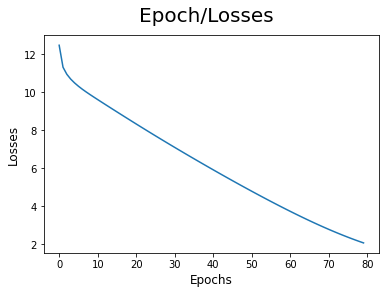

In [97]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [98]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [99]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))
accuracy()

0.78515625

In [117]:
predict("reading books is very ".split())

'also'